[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/02%20An%C3%A1lisis%20Estad%C3%ADstico/notebooks/exercises/Practica5_Estadistica.ipynb)

----

<h1><center>Monte Carlo</center></h1>
    
    
El algoritmo se basa en el muestreo aleatorio repetido en un intento de determinar la probabilidad. Esto significa simular un evento con entradas aleatorias un gran número de veces para obtener su estimación.
    
Las simulaciones Monte Carlo se pueden utilizar en una amplia gama de campos que van desde la economía, el juego, la ingeniería, la energía y cualquier otro campo intermedio. Por lo tanto, no importa en qué campo profesional se encuentre, es algo excelente que debe conocer.

---

Al aprender a construir simulaciones Monte Carlo, es mejor comenzar con un modelo básico para comprender los fundamentos. La forma más fácil y común de hacerlo es con juegos simples, por lo que utilizaremos un juego de dados en este caso.

Probablemente haya escuchado el dicho, "la casa siempre gana", así que para este ejemplo, la casa (típicamente un casino) tendrá una ventaja, y mostraremos lo que eso significa para las posibles ganancias del jugador.



## El juego de dados

Nuestro juego simple involucrará dos dados de seis caras. P

ara ganar, el jugador debe sacar el mismo número en ambos dados.

Un dado de seis caras tiene seis resultados posibles (1, 2, 3, 4, 5 y 6). Con dos dados, ahora hay 36 resultados posibles (1 y 1, 1 y 2, 1 y 3, etc., o 6 x 6 = 36 posibilidades).

En este juego, la casa tiene más oportunidades de ganar (30 resultados frente a los 6 resultados del jugador), lo que significa que la casa tiene bastante ventaja.

---

Digamos que nuestro jugador comienza con un saldo de 1,000 y está preparado para perderlo todo, por lo que apuesta 1 en cada tirada (lo que significa que se tiran ambos dados) y decide jugar 1,000 tiradas. Debido a que la casa es tan generosa, ofrecen pagar 4 veces la apuesta del jugador cuando el jugador gana.

Por ejemplo, si el jugador gana la primera tirada, su saldo aumenta en $4 y finaliza la ronda con un saldo de 1,004. Si milagrosamente lograban una racha de 1000 victorias, podrían irse a casa con 5000. Si perdía todas las rondas, podrían irse a casa sin nada. No es una mala relación riesgo-recompensa… o tal vez lo sea.

In [ ]:
# Importando paqueterias
import matplotlib.pyplot as plt
import random
import pandas as pd

Ahora, debemos definir nuestra función que genere valores entre 1 y 6 para ambos dados. Podemos auxiliarnos con la funcion *random.randinit()*

Tomando en consideración la condición de que si el dado 1 es identico al dado 2, tendremos un resultado positivo en la apuesta, caso contrario, tendremos una derrota.

In [ ]:
# Creando funcion de lanzamiento de dados
def roll_dice():
    dice_one = random.randint(1, 6)
    dice_two = random.randint(1, 6)
    same_num = dice_one == dice_two
    return same_num

Cada simulación Monte Carlo requerirá que sepa cuáles son sus entradas y qué información está buscando obtener.

En esta práctica, ya definimos cuáles son nuestras entradas cuando describimos el juego. **Dijimos que nuestra cantidad de tiradas por juego es 1,000, y la cantidad que el jugador apostará en cada tirada es $1**.

Además de nuestras variables de entrada, necesitamos definir cuántas veces queremos simular el juego. Podemos usar la variable num_simulations como nuestro conteo de simulación de Monte Carlo. Cuanto más alto hagamos este número, más precisa será la probabilidad predicha de su valor real.

La cantidad de variables que podemos rastrear generalmente aumenta con la complejidad de un proyecto, por lo que es importante precisar sobre qué información deseamos trabajar.

Para este caso, realizaremos un seguimiento de la probabilidad de ganar (ganancias por juego divididas por el número total de tiradas) y el saldo final para cada simulación (o juego). Estos se inicializan como listas y se actualizarán al final de cada juego.

In [ ]:
# Entradas
num_simulations = 10000 #Valor dado
max_num_rolls = 1000
bet = 1

# Seguimiento
win_probability = []
end_balance = []

### Configuración de la figura

El siguiente paso es configurar nuestra figura antes de ejecutar la simulación. Al hacer esto antes de la simulación, nos permite agregar líneas a nuestra figura después de cada juego. Luego, una vez que hayamos ejecutado todas las simulaciones, podemos mostrar la gráfica para mostrar nuestros resultados.

(0.0, 1000.0)

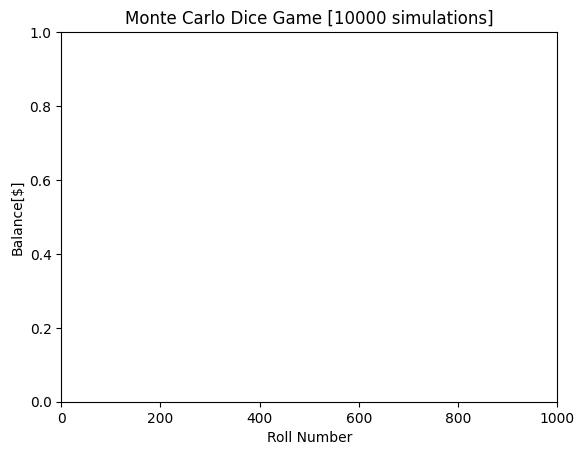

In [ ]:
# Creando figura para los ejemplos de simulacion
fig = plt.figure()
plt.title('Monte Carlo Dice Game [10000 simulations]')
plt.ylabel('Balance[$]')
plt.xlabel('Roll Number')
plt.xlim(0, 1000)

En el siguiente código, tenemos un bucle for externo que itera a través de nuestro número predefinido de simulaciones (10 000 simulaciones) y un bucle while anidado que ejecuta cada juego (1000 tiradas).

Antes de comenzar cada ciclo while, inicializamos el saldo del jugador como $1,000 (como una lista para fines de trazado) y un conteo de tiradas y ganancias.

    * Nuestro bucle while simulará el juego durante 1000 tiradas. Dentro de este bucle, lanzamos los dados y usamos la variable booleana devuelta por roll_dice() para determinar el resultado. Si los dados son del mismo número, agregamos 4 veces la apuesta a la lista de saldo y agregamos una ganancia al conteo de ganancias. Si los dados son diferentes, restamos la apuesta de la lista de saldo. Al final de cada lanzamiento, agregamos un conteo a nuestra lista num_rolls.

Una vez que el número de lanzamientos llega a 1000, podemos calcular la probabilidad de ganar del jugador como el número de ganancias dividido por el número total de lanzamientos.

También podemos almacenar el saldo final del juego completo en la variable de seguimiento end_balance. Finalmente, podemos trazar las variables num_rolls y balance para agregar una línea a la figura que definimos anteriormente.

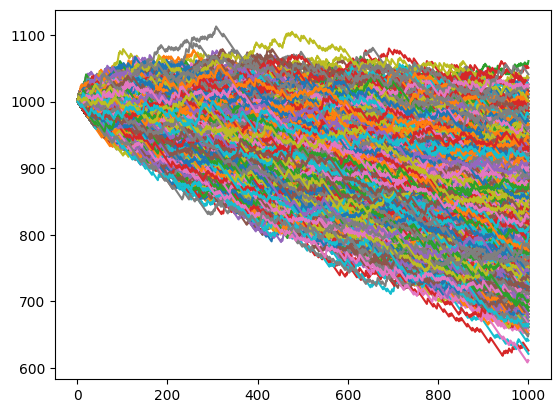

In [ ]:
# For para ejecutar todas las simulaciones deseadas
for i in range(num_simulations):
    balance = [1000]
    num_rolls = [1]
    num_wins = [0]

    while num_rolls[-1] < max_num_rolls:
        if roll_dice():
            balance.append(balance[-1] + 4 * bet)
            num_wins.append(num_wins[-1] + 1)
        else:
            balance.append(balance[-1] - 1 * bet)
            num_wins.append(num_wins[-1] + 0)

        num_rolls.append(num_rolls[-1] + 1)# Store tracking variables and add line to figure
    win_probability.append(num_wins[-1] / num_rolls[-1])
    end_balance.append(balance[-1])
    plt.plot(num_rolls, balance)

In [ ]:
# Probabilidad promedio de victoria y saldo final
overall_win_probability = sum(win_probability) / len(win_probability)
overall_end_balance = sum(end_balance) / len(end_balance)
print("Promedio de victorias despues de " + str(num_simulations) + " simulaciones: " + str(overall_win_probability))
print("Saldo promedio despues de " + str(num_simulations) + " simulaciones: $" + str(overall_end_balance))

Promedio de victorias despues de 10000 simulaciones: 0.16628249999999958
Saldo promedio despues de 10000 simulaciones: $832.4125


## Desafio complementario

Ahora, realiza el mismo procedimiento pero mostrando los
resultados para 10, 100, 1000 y 10000 lanzamientos, considerando 200, 2000 y 20000 simulaciones.

Como bien sabemos, cada que gana el individuo, la casa le pagaba 4 veces el valor de la apuesta.
Ahora, si gana, le pagaran 6 veces mas de lo apostado, siempre y cuando el individuo apueste de 3 en 3.

El monto inicial sería ahora de 800. ¿Cuánta diferencia existe entre los resultados obtenidos para cada escenario?
¿En cuales se tiene un porcentaje mayor de victoria?

Grafica estos resultados utilizando graficas de pastel y de barras y realiza una comparación entre ellos.

In [ ]:
def monte_carlo_sim(num_simulations, max_num_rolls, bet, inicial_qty, pay_factor):
    for i in range(num_simulations):
        balance = [inicial_qty]
        num_rolls = [1]
        num_wins = [0]

        while num_rolls[-1] < max_num_rolls:
            if roll_dice():
                balance.append(balance[-1] + pay_factor * bet)
                num_wins.append(num_wins[-1] + 1)
            else:
                balance.append(balance[-1] - 1 * bet)
                num_wins.append(num_wins[-1] + 0)

            num_rolls.append(num_rolls[-1] + 1)# Store tracking variables and add line to figure
        win_probability.append(num_wins[-1] / num_rolls[-1])
        end_balance.append(balance[-1])
        #p = plt.plot(num_rolls, balance)
    return num_rolls, balance, num_wins, win_probability, end_balance

In [ ]:
# For para ejecutar todas las simulaciones deseadas
num_rolls_list = [10, 100, 1000, 10000]
num_simulations_list = [200, 2000, 20000]

x = []
for k in num_simulations_list:
    for l in num_rolls_list:
        x.append((k, l))

#plt.figure(figsize=(8,30))
overall_win_probability = []
overall_end_balance = []
overall = {}
for i, j in x:
    monte_carlo_sim(i, j, 3, 800, 6)
    overall_win_probability.append(sum(win_probability) / len(win_probability))
    overall_end_balance.append(sum(end_balance) / len(end_balance))

In [ ]:
overall_results = pd.DataFrame({"Rolls-Simulations": x,
                                "overall_win_probability": overall_win_probability,
                                "overall_end_balance": overall_end_balance})


<Axes: ylabel='Rolls-Simulations'>

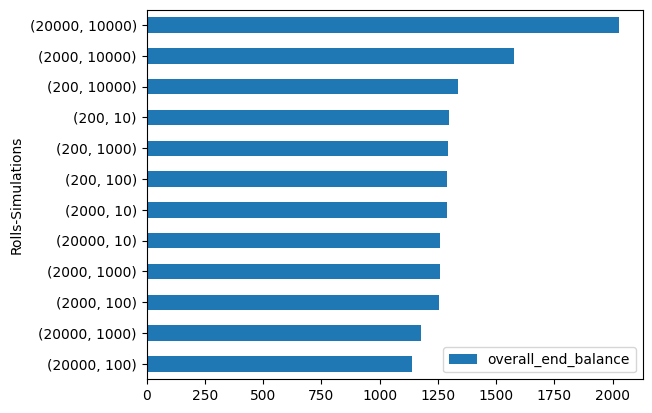

In [ ]:
'''
El monto inicial sería ahora de 800. ¿Cuánta diferencia existe entre los resultados obtenidos para cada escenario? ¿En cuales se tiene un porcentaje mayor de victoria?
Grafica estos resultados utilizando graficas de pastel y de barras y realiza una comparación entre ellos.
'''
overall_results.sort_values('overall_end_balance', ascending=True).plot.barh(x="Rolls-Simulations", y="overall_end_balance")

Todos los escenarios tiene una probabilidad muy similar de ganar (~16.6%)

## Run silumations for 12 new scenarios

In [ ]:
# For para ejecutar todas las simulaciones deseadas
num_rolls_list = [10, 100, 1000, 10000]
num_simulations_list = [200, 2000, 20000]

x = []
for k in num_simulations_list:
    for l in num_rolls_list:
        x.append((k, l))

overall_win_probability = []
overall_end_balance = []
overall = {}
for i, j in x:
    #plt.subplot(plots_number, 1, x.index((i, j)) + 1)
    #plt.title(f"{i} simulations and {j} rolls")
    monte_carlo_sim(i, j, 1, 1000, 4)
    overall_win_probability.append(sum(win_probability) / len(win_probability))
    overall_end_balance.append(sum(end_balance) / len(end_balance))

In [ ]:
overall_results_12_scenarios = pd.DataFrame({"Rolls-Simulations": x,
                                "overall_win_probability": overall_win_probability,
                                "overall_end_balance": overall_end_balance})

In [ ]:
overall_results_12_scenarios

,Rolls-Simulations,overall_win_probability,overall_end_balance
0,"(200, 10)",0.144500,998.225000
1,"(200, 100)",0.155500,991.237500
2,"(200, 1000)",0.159262,939.133333
3,"(200, 10000)",0.161098,537.193750
4,"(2000, 10)",0.153171,866.698214
5,"(2000, 100)",0.158100,915.365625
6,"(2000, 1000)",0.160518,891.025000
7,"(2000, 10000)",0.161884,535.686364
8,"(20000, 10)",0.154385,857.122396
9,"(20000, 100)",0.158844,908.970902


<Axes: ylabel='Rolls-Simulations'>

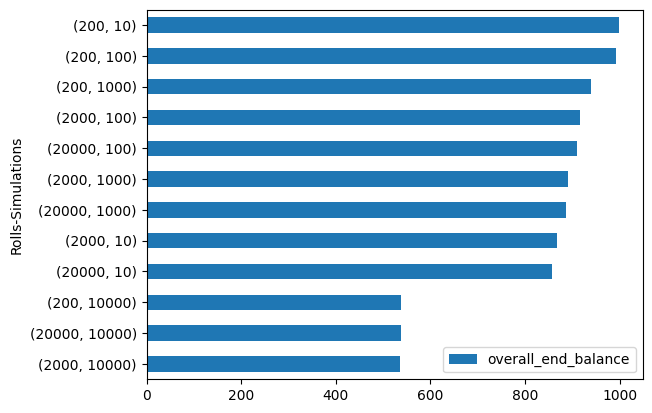

In [ ]:
'''
Ahora, realiza el mismo procedimiento pero mostrando los resultados para 10, 100, 1000 y 10000 lanzamientos, considerando 200, 2000 y 20000 simulaciones.
'''
overall_results_12_scenarios.sort_values('overall_end_balance', ascending=True).plot.barh(x="Rolls-Simulations", y="overall_end_balance")